In [1]:
import numpy as np
import pandas as pd

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# mount with google drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data=pd.read_csv('/content/drive/MyDrive/M.L projects/Airlines(RNN)/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
data.shape

(144, 2)

In [14]:
train=data['#Passengers'][:120]
test=data['#Passengers'][120:]

In [19]:
train=train.values
test=test.values

In [24]:
train=np.reshape(train,(len(train),1))
test=np.reshape(test,(len(test),1))

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train=sc.fit_transform(train)
test=sc.transform(test)

In [26]:
def create_dataset(data,k):
  datax,datay=[],[]
  for i in range(data.shape[0]-k):
    x=data[i:i+k,0]
    y=data[i+k,0]
    datax.append(x)
    datay.append(y)
  return np.array(datax),np.array(datay)

In [28]:
look_back=12
train_x,train_y=create_dataset(train,look_back)
test_x,test_y=create_dataset(test,look_back)

In [30]:
train_x.shape

(108, 12)

In [33]:
# reshaping in 3-d 
train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
test_x=np.reshape(test_x,(test_x.shape[0],train_x.shape[1],1))

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from  keras.models import Sequentials
from keras.layers import SimpleRNN,Dense

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(4, input_shape=(look_back,1)))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(train_x,train_y,epochs=100,batch_size=1)

Epoch 1/100
108/108 [==============================] - 1s 2ms/step - loss: 0.0345
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 8/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 9/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 10/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 11/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 12/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 13/100


In [39]:
test_predict=model.predict(test_x)
test_predict=sc.inverse_transform(test_predict).ravel()

train_predict=model.predict(train_x)
train_predict=sc.inverse_transform(train_predict).ravel()

test_true=sc.inverse_transform([test_y]).ravel()
train_true=sc.inverse_transform([train_y]).ravel()

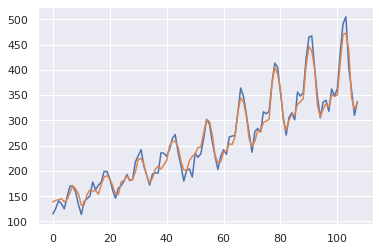

In [42]:
plt.plot(train_true)
plt.plot(train_predict)
plt.show()

In [43]:
test_true.shape

(12,)

In [51]:
data.Month[len(data)-12:].values
test_predict

array([368.64792, 355.6255 , 370.1397 , 365.81088, 385.36554, 413.51025,
       478.8108 , 487.56342, 458.0354 , 377.64468, 349.57184, 351.7082 ],
      dtype=float32)

In [53]:
import plotly.express as px
import plotly.graph_objects as go

fig=go.Figure()

# fig.add_trace(go.Scatter(
#     x=data.Month[len(data)-12:].values,
#     y=test_predict,
#     name="predicted"
# ))

# fig.add_trace(go.Scatter(
#     x=data.Month[len(data)-12:].values,
#     y=test_true,
#     name="original"
# ))
fig.add_trace(go.Scatter(
    x=data.Month[len(data)-12:].values,
    y=train_predict,
    name="predicted"
))

fig.add_trace(go.Scatter(
    x=data.Month[len(data)-12:].values,
    y=train_true,
    name="original"
))

fig.update_layout(
    title='test_true vs test_predict',
    xaxis_title='Date',
    yaxis_title='Data'
)
